In [46]:
import json
import pdb
import argparse
from easydict import EasyDict as edict
import jsonlines
import yaml
import random

import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline 


In [73]:
# Retrieval:

topK = 5
num_show = 1
image_dir = '/srv/datasets/flickr30k/flickr30k_images/'
input_file_path = '../results/RetrievalFlickr30k_bert_base_6layer_6conect-pretrained/test_result.json'
compare_file_path = '../results/RetrievalFlickr30k_bert_base_6layer_6conect-scratch/test_result.json'
data_file_path = '../data/flickr30k/all_data_final_test_set0_2014.jsonline'

input_file = json.load(open(input_file_path, 'r'))
compare_file = json.load(open(compare_file_path, 'r'))


with jsonlines.open(data_file_path) as reader:
    entries = []
    imgid2entry = {}
    img_paths = []
    count = 0
    for annotation in reader:
        image_path = annotation['img_path']
        image_id = int(annotation['img_path'].split('.')[0])
        if image_path not in img_paths:
            img_paths.append(image_path)
        imgid2entry[image_id] = []
        for sentences in annotation['sentences']:
            entries.append({"caption": sentences, 'image_id':image_id})
            imgid2entry[image_id].append(count)
            count += 1
            
index_to_show = []
error_to_show = []
input_accuracy = 0
compare_accuracy = 0
index_accuracy = 0

for i in range(len(input_file)):
    correct_input = False
    target = int(i / 5)
    if target in input_file[i][:topK]:
        correct_input = True
        input_accuracy += 1
    correct_compare = False
    if target in compare_file[i][:topK]:
        correct_compare = True
        compare_accuracy += 1
    if correct_input and not correct_compare:
        index_to_show.append(i)
        index_accuracy += 1
    if not correct_input:
        error_to_show.append(i)
        
print(input_accuracy / float(len(input_file)))
print(compare_accuracy / float(len(input_file)))
print(index_accuracy / float(len(input_file)))

print(len(input_file))
print(len(entries))

0.849
0.7678
0.1238
5000
5000


109
caption: two german sheppard dogs are fighting


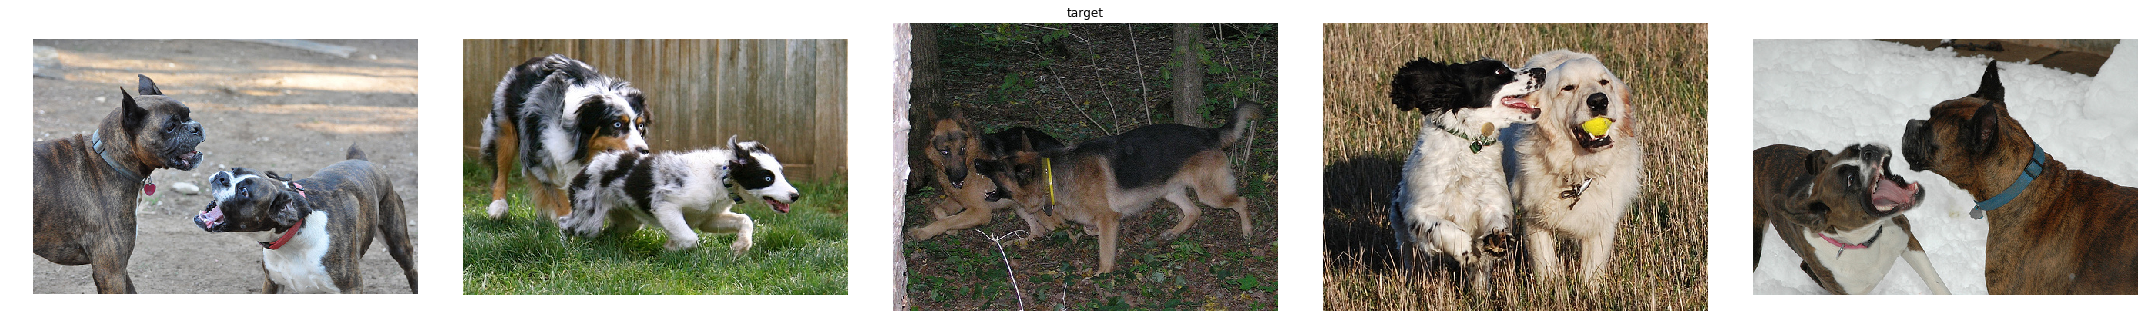

In [104]:
caption_idx = int(random.random() * len(index_to_show))

print(caption_idx)
ncols = 5
nrows = 1

figsize = [ncols*6, ncols*5]     # figure size, inches
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    j = i % ncols
    idx = index_to_show[caption_idx]
    
    entry = entries[idx]
    target = int(idx / 5)
    if i < ncols:
        img_ids = input_file[idx]
    else:
        img_ids = compare_file[idx]
    
    img = PIL.Image.open(image_dir + img_paths[img_ids[j]]).convert('RGB')
    axi.imshow(img)
    axi.axis('off')
    
    if target == img_ids[j]:
        axi.set_title('target')

        
print("caption: %s" %(entry['caption']))
plt.axis('off')
plt.tight_layout(True)
plt.show()

741
caption: a dog with big ears is holding a small stick in its mouth


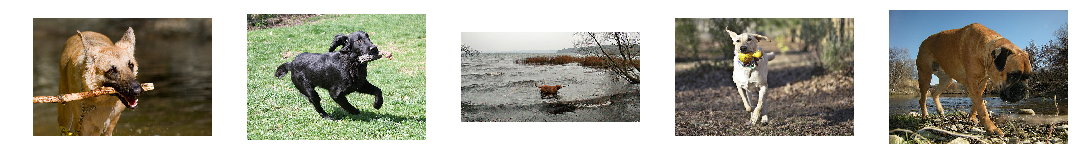

In [113]:
#Show the errors.

caption_idx = int(random.random() * len(error_to_show))

print(caption_idx)
ncols = 5
nrows = 1

figsize = [ncols*3, ncols*5]     # figure size, inches
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    j = i % ncols
    idx = error_to_show[caption_idx]
    
    entry = entries[idx]
    target = int(idx / 5)
    img_ids = input_file[idx]

    
    img = PIL.Image.open(image_dir + img_paths[img_ids[j]]).convert('RGB')
    axi.imshow(img)
    axi.axis('off')
    
    if target == img_ids[j]:
        axi.set_title('target')

        
print("caption: %s" %(entry['caption']))
plt.axis('off')
plt.tight_layout(True)
plt.show()